In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/ice-sheet-mass-balance.csv", parse_dates=[2])
df

,Entity,Code,Day,"Cumulative change in mass in the ice sheets, according to NASA/JPL"
0,Antarctica,ATA,2002-04-16,0.00
1,Antarctica,ATA,2002-05-08,19.48
2,Antarctica,ATA,2002-08-14,-58.91
3,Antarctica,ATA,2002-09-16,47.16
4,Antarctica,ATA,2002-10-15,63.42
...,...,...,...,...
379,Greenland,GRL,2020-08-13,-4991.28
380,Greenland,GRL,2020-09-15,-4996.08
381,Greenland,GRL,2020-10-14,-4928.75
382,Greenland,GRL,2020-11-12,-4922.26


In [3]:
antarctica = df.loc[df.Entity=="Antarctica"]
antarctica

,Entity,Code,Day,"Cumulative change in mass in the ice sheets, according to NASA/JPL"
0,Antarctica,ATA,2002-04-16,0.00
1,Antarctica,ATA,2002-05-08,19.48
2,Antarctica,ATA,2002-08-14,-58.91
3,Antarctica,ATA,2002-09-16,47.16
4,Antarctica,ATA,2002-10-15,63.42
...,...,...,...,...
187,Antarctica,ATA,2020-08-13,-2249.69
188,Antarctica,ATA,2020-09-15,-2437.63
189,Antarctica,ATA,2020-10-14,-2537.64
190,Antarctica,ATA,2020-11-12,-2587.65


In [4]:
antarctica = antarctica.drop(columns=["Entity", "Code"])
antarctica = antarctica.rename(
    columns={
        "Cumulative change in mass in the ice sheets, according to NASA/JPL": "cummulative_ice_mass_change",
        "Day": "date",
    }
)
antarctica = antarctica.set_index("date")
antarctica

,cummulative_ice_mass_change
date,
2002-04-16,0.00
2002-05-08,19.48
2002-08-14,-58.91
2002-09-16,47.16
2002-10-15,63.42
...,...
2020-08-13,-2249.69
2020-09-15,-2437.63
2020-10-14,-2537.64


In [5]:
greenland = df.loc[df.Entity=="Greenland"]
greenland

,Entity,Code,Day,"Cumulative change in mass in the ice sheets, according to NASA/JPL"
192,Greenland,GRL,2002-04-16,0.00
193,Greenland,GRL,2002-05-08,67.36
194,Greenland,GRL,2002-08-14,-219.73
195,Greenland,GRL,2002-09-16,-242.79
196,Greenland,GRL,2002-10-15,-207.56
...,...,...,...,...
379,Greenland,GRL,2020-08-13,-4991.28
380,Greenland,GRL,2020-09-15,-4996.08
381,Greenland,GRL,2020-10-14,-4928.75
382,Greenland,GRL,2020-11-12,-4922.26


In [6]:
greenland = greenland.drop(columns=["Entity", "Code"])
greenland = greenland.rename(
    columns={
        "Cumulative change in mass in the ice sheets, according to NASA/JPL": "cummulative_ice_mass_change",
        "Day": "date",
    }
)
greenland = greenland.set_index("date")
greenland

,cummulative_ice_mass_change
date,
2002-04-16,0.00
2002-05-08,67.36
2002-08-14,-219.73
2002-09-16,-242.79
2002-10-15,-207.56
...,...
2020-08-13,-4991.28
2020-09-15,-4996.08
2020-10-14,-4928.75


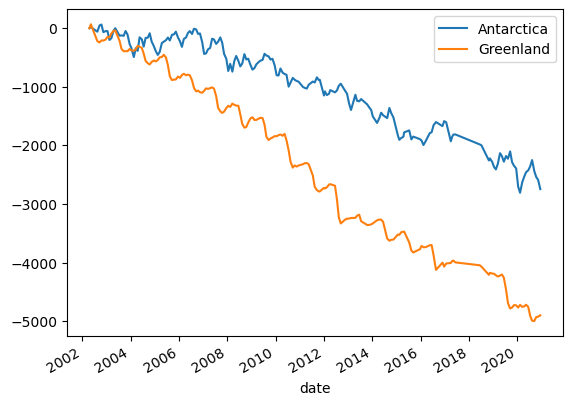

In [7]:
fig, ax = plt.subplots()
antarctica.plot(ax=ax)
greenland.plot(ax=ax) 
plt.legend(["Antarctica", "Greenland"])
plt.show()

In [8]:
antarctica_old = antarctica[antarctica.index < pd.Timestamp("2018-01-01")]
greenland_old = greenland[greenland.index < pd.Timestamp("2018-01-01")]

In [9]:
antarctica_old

,cummulative_ice_mass_change
date,
2002-04-16,0.00
2002-05-08,19.48
2002-08-14,-58.91
2002-09-16,47.16
2002-10-15,63.42
...,...
2017-01-22,-1604.80
2017-04-02,-1929.12
2017-04-23,-1849.02


In [10]:
antarctica_old.to_csv("ice-mass-sheet-balance-antarctica.csv")

In [11]:
greenland_old.to_csv("ice-mass-sheet-balance-greenland.csv")

In [12]:
antarctica.to_csv("ice-mass-sheet-balance-antarctica.csv")

In [13]:
greenland.to_csv("ice-mass-sheet-balance-greenland.csv")